In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [2]:
train_mnist_dataset = datasets.MNIST(
    root="../data", 
    train=True, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_mnist_dataset = datasets.MNIST(
    root="../data", 
    train=False, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))
    ])
)

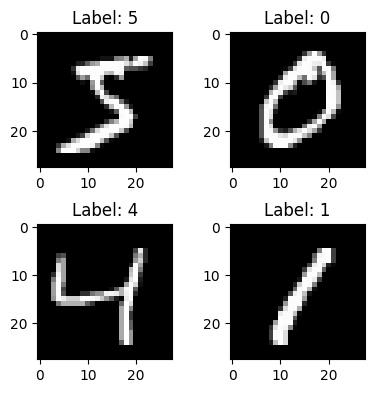

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4))

fig.tight_layout()
axs = axs.flatten()

data_iter = iter(train_mnist_dataset)

for i in range(4):
    X, y = next(data_iter)

    axs[i].imshow(X[0], cmap='gray')
    axs[i].set_title(f"Label: {y}")
plt.show()

In [4]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for batch_idx, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        y_pred = model(X)
        loss = F.nll_loss(y_pred, y)
        loss.backward()
        optim.step()
        if batch_idx % 10 == 0:
            print(
                f"Train Epoch: {epoch} [{batch_idx * len(X)}/{len(train_dataloader.dataset)}] "
                f"({100. * batch_idx / len(train_dataloader):.0f}%)]\tLoss: {loss.item():.6f}"
            )

In [5]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += F.nll_loss(y_pred, y, reduction="sum").item()
            pred = y_pred.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
            print(
                "\nTest dataset: Overall Loss: {:.4f}, \
          Overall Accuracy: {}/{} ({:.0f}%)\n".format(
                    loss, success, len(test_dataloader.dataset), 100.0 * success / len(test_dataloader.dataset)
                )
            )

In [6]:
train_dataloader = torch.utils.data.DataLoader(train_mnist_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_mnist_dataset, batch_size=500, shuffle=False)

In [7]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.10),
    nn.Flatten(),
    nn.Linear(4608, 64),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1),
)

In [8]:
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

In [9]:
torch.manual_seed(0)
device = torch.device("cpu")

In [10]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)


Train Epoch: 1 [0/60000] (0%)]	Loss: 2.281500
Train Epoch: 1 [320/60000] (1%)]	Loss: 1.525084
Train Epoch: 1 [640/60000] (1%)]	Loss: 0.904104
Train Epoch: 1 [960/60000] (2%)]	Loss: 0.777221
Train Epoch: 1 [1280/60000] (2%)]	Loss: 0.653944
Train Epoch: 1 [1600/60000] (3%)]	Loss: 0.476911
Train Epoch: 1 [1920/60000] (3%)]	Loss: 0.433187
Train Epoch: 1 [2240/60000] (4%)]	Loss: 0.488503
Train Epoch: 1 [2560/60000] (4%)]	Loss: 0.444637
Train Epoch: 1 [2880/60000] (5%)]	Loss: 0.435532
Train Epoch: 1 [3200/60000] (5%)]	Loss: 0.192917
Train Epoch: 1 [3520/60000] (6%)]	Loss: 0.492248
Train Epoch: 1 [3840/60000] (6%)]	Loss: 0.540240
Train Epoch: 1 [4160/60000] (7%)]	Loss: 0.347509
Train Epoch: 1 [4480/60000] (7%)]	Loss: 0.242812
Train Epoch: 1 [4800/60000] (8%)]	Loss: 0.250578
Train Epoch: 1 [5120/60000] (9%)]	Loss: 0.132229
Train Epoch: 1 [5440/60000] (9%)]	Loss: 0.211730
Train Epoch: 1 [5760/60000] (10%)]	Loss: 0.066127
Train Epoch: 1 [6080/60000] (10%)]	Loss: 0.338659
Train Epoch: 1 [6400/600

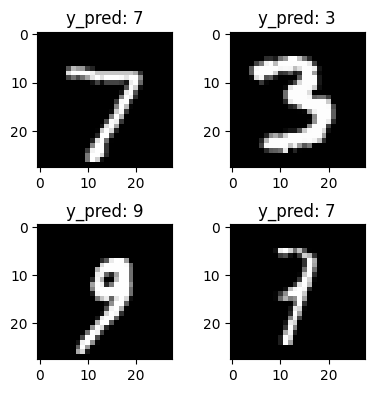

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4))

fig.tight_layout()
axs = axs.flatten()

data_iter = iter(test_dataloader)

for i in range(4):
    X, y = next(data_iter)
    y_pred = model(X)
    pred = y_pred.argmax(dim=1, keepdim=True)


    axs[i].imshow(X[0][0], cmap='gray')
    axs[i].set_title(f"y_pred: {pred[0].item()}"),
plt.show()